# Joe S Sub-Metric Notebook

## Introduction 

The goal of the project is to find the best neighborhood in Pittsburgh.  I at first was going to just use the numbers of arrests but I realized that is biased towards smaller cities, also the data is over 7 years

therefore it is a better metric to average the data and divide it by population.

## Sub-Metric

(Arrest Count/7)/(Population)

Population Data From: https://data.wprdc.org/dataset/2020-census-redistricting-data-extracts/resource/a8414ed5-c50f-417e-bb67-82b734660da6, revised into a smaller chart by me


Data: https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f

Looking at the neighboorhood with the least arrests per population

## Code

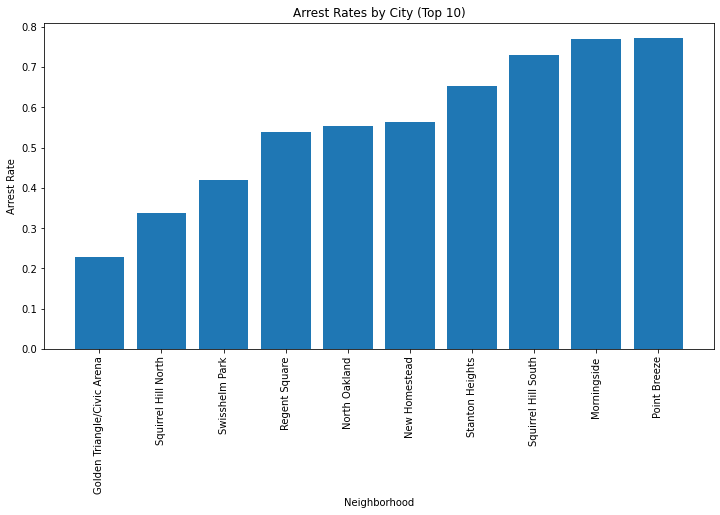

,neighborhood,arrest rate
36,Golden Triangle/Civic Arena,0.227978
76,Squirrel Hill North,0.338190
82,Swisshelm Park,0.419859
66,Regent Square,0.538793
56,North Oakland,0.553773
55,New Homestead,0.562771
79,Stanton Heights,0.652032
77,Squirrel Hill South,0.728940
52,Morningside,0.768508
63,Point Breeze,0.771402


In [91]:
import pandas as pd
import matplotlib.pyplot as plt #import statements
police = pd.read_csv("police.csv") #read arrest data
arrests_by_city = police.groupby('INCIDENTNEIGHBORHOOD')['PK'].count() #groupby neightboorhood/accidently put city
arrests_df = pd.DataFrame({'neighborhood': arrests_by_city.index, 'count': arrests_by_city.values}) #new data frame of just count and neighborhood
arrests_df = arrests_df.drop(labels=[63,64,65], axis=0) #removing out of city, out of country, and out of state
arrests_df.loc[54, "count"] += arrests_df.loc[56, "count"] #Combining to agree with population csv
arrests_df.loc[54, "count"] += arrests_df.loc[57, "count"]
arrests_df.loc[90, "count"] += arrests_df.loc[91, "count"]
arrests_df.loc[18, "count"] += arrests_df.loc[19, "count"]
arrests_df.loc[54, "neighborhood"] = "Mount Oliver + Mt. Oliver Neighborhood:" #Renaming to agree with population csv
arrests_df.loc[90, "neighborhood"] = "Troy Hill + Troy Hill-Herrs Island:"
arrests_df.loc[18, "neighborhood"] = "Central Northside + Central North Side:"
arrests_df = arrests_df.drop(labels=[56,57,91,19], axis=0) #Dropping the extra
population_df = pd.read_csv("populations.csv") #read pop data
population_df.rename(columns={"City": "neighborhood"}, inplace=True) #Renaming to agree with arrests
population_df.rename(columns={"Population": "population"}, inplace=True) #Vanity things
merged_df = arrests_df.merge(population_df, on="neighborhood") #Merge the sets
merged_df["average arrests per year"] = merged_df["count"] / 7 #Calculating metric
merged_df["arrest rate"] = (merged_df["average arrests per year"] / merged_df["population"]) * 100
only_rates = merged_df[["neighborhood", "arrest rate"]] #df of only the rate and neighborhood
only_rates = only_rates.sort_values(by="arrest rate").head(10) #top ten for plot
fig, ax = plt.subplots(figsize=(12, 6)) #creating plot
ax.bar(only_rates["neighborhood"], only_rates["arrest rate"]) #setting bars
ax.set_xticklabels(only_rates["neighborhood"], rotation=90) #adding labels and ticks
ax.set_ylabel("Arrest Rate")
ax.set_xlabel("Neighborhood")
ax.set_title("Arrest Rates by City (Top 10)") #title
plt.show() #graph
only_rates.head(10) #output top ten table


## Best Neighborhood and Conclusion

By just looking at the results the best neighborhood seems to be the Golden Triangle/Civic Arena area.

However, at the moment this result is just one submetric found by me.  I need to compare with my group members to find the best of all submetrics.

This data also may be biased as arrests don't always end in a conviction and could have wrongfully accused people.